# Import libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import utils
import preprocess
import detect_answer 
import detect_cross

# Load image

In [15]:
plt.rcParams['figure.figsize'] = [8, 8]

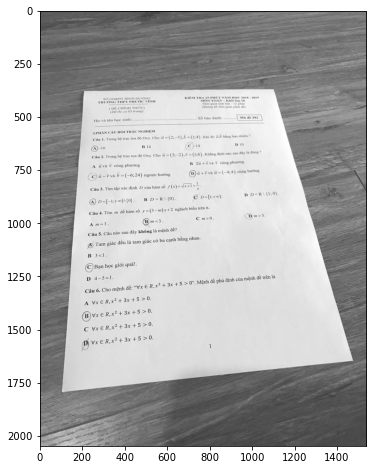

In [16]:
img = cv2.imread('examf.jpg', 0)
plt.imshow(img, cmap='gray')

# Preprocessor

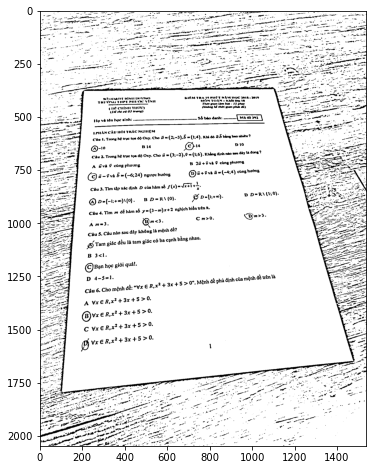

In [17]:
binary_img = preprocess.toBinary(img, (5,5))

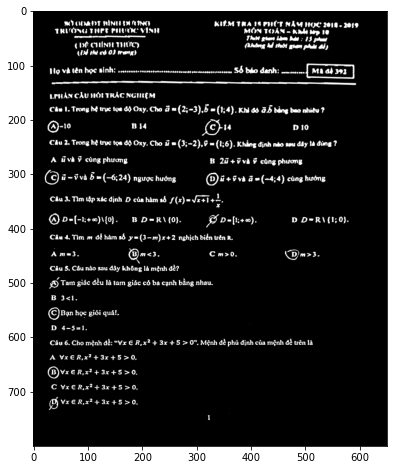

In [18]:
thresh = preprocess.threshold(binary_img)
approx,box = preprocess.findContour(thresh)
binary_img = preprocess.turnning(approx,box,binary_img)
img = preprocess.turnning(approx,box,img)
dsize = (650,800)
binary_img = cv2.resize(binary_img,dsize)
img = cv2.resize(img,dsize)
plt.imshow(binary_img, cmap='gray')

# Mark

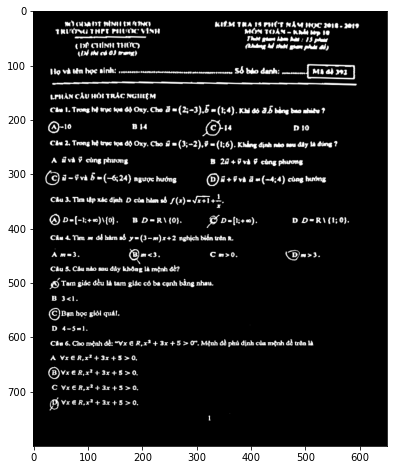

In [19]:
close = utils.closing(binary_img, (2,2))

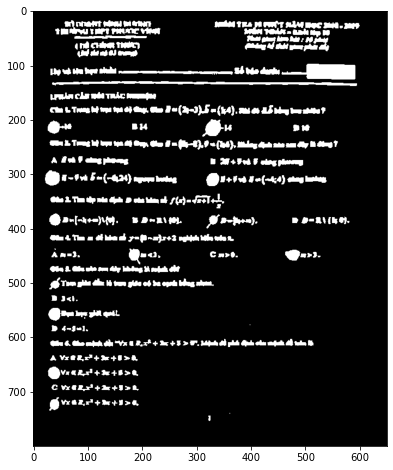

In [20]:
filled = utils.fill_holes(close)

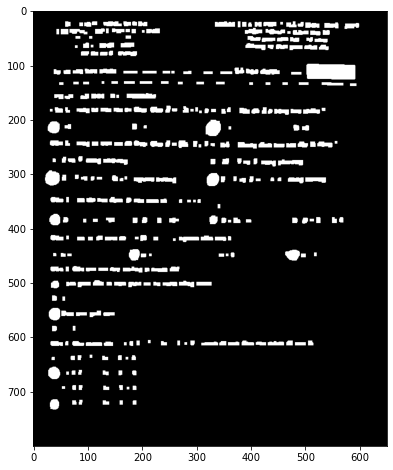

In [21]:
open = utils.opening(filled, (5,5))

In [22]:
contours = utils.find_contours(open)

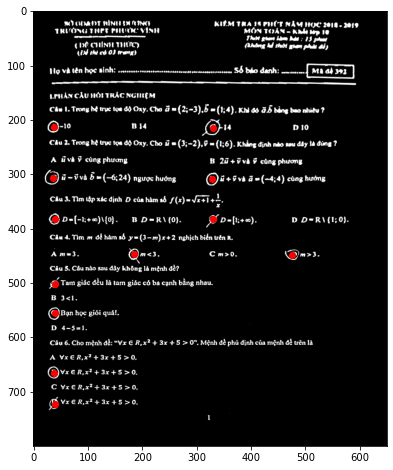

[[39, 723],
 [38, 665],
 [39, 556],
 [40, 502],
 [476, 448],
 [185, 447],
 [330, 383],
 [39, 383],
 [329, 309],
 [35, 306],
 [37, 213],
 [330, 214]]

In [23]:
circle_centers = utils.detect_circle(binary_img, contours, 0.7, 135)
circle_centers

In [30]:
choices = detect_cross.get_circles_no_cross(close, circle_centers)

In [25]:
answers = detect_answer.get_answer(choices)
answers

[2, 0, 2, 3, 0, 3, 0, 2, 1, 3]

In [28]:
right_answers = ['B', 'B', 'A', 'A', 'A', 'C']
right_answers = detect_answer.convert_answer_type(right_answers)
right_answers

[1, 1, 0, 0, 0, 2]

In [ ]:
score = utils.get_score(answers, right_answers)
print(score)